In [1]:
!pip install numpy pandas matplotlib seaborn scipy


In [9]:
from google.colab import files
uploaded = files.upload()




Saving 311_Service_Requests_from_2010_to_Present.csv to 311_Service_Requests_from_2010_to_Present.csv


In [11]:
import pandas as pd

# Assuming the uploaded file is named '311_Service_Requests_from_2010_to_Present.csv'
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

# Display the first few rows of the dataframe
data.head()


<ipython-input-11-5f3926f99f1c>:4: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [13]:

data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])
data['Request_Closing_Time'] = data['Closed Date'] - data['Created Date']
data['Request_Closing_Time'] = data['Request_Closing_Time'].dt.total_seconds() / 3600  # Convert to hours


<ipython-input-13-722bba662927>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Created Date'] = pd.to_datetime(data['Created Date'])
<ipython-input-13-722bba662927>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Closed Date'] = pd.to_datetime(data['Closed Date'])


In [14]:
data.to_csv('preprocessed_311_data.csv', index=False)


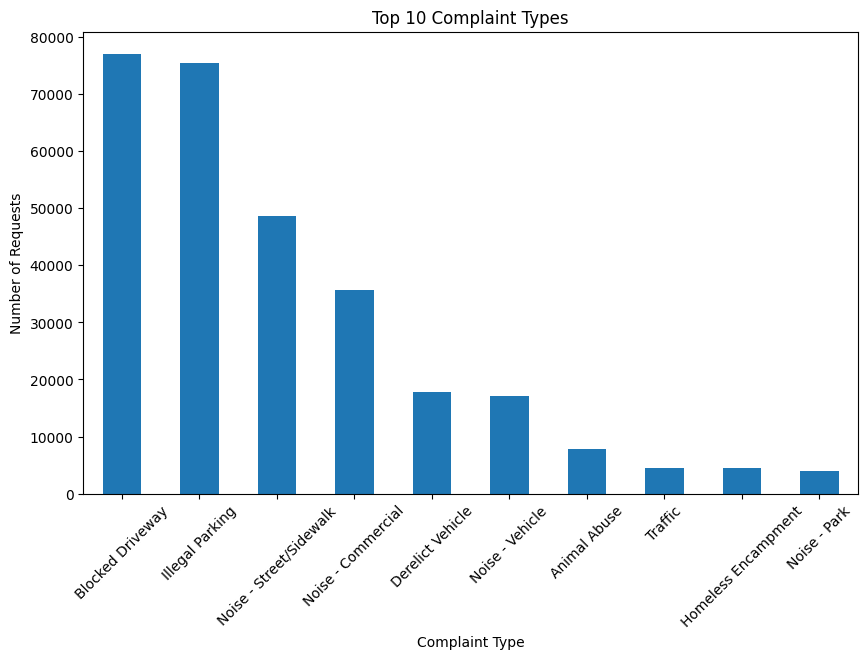

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
data['Complaint Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()
